### Imports

In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Monte Carlo Program for the Two-Dimensional Ising Model

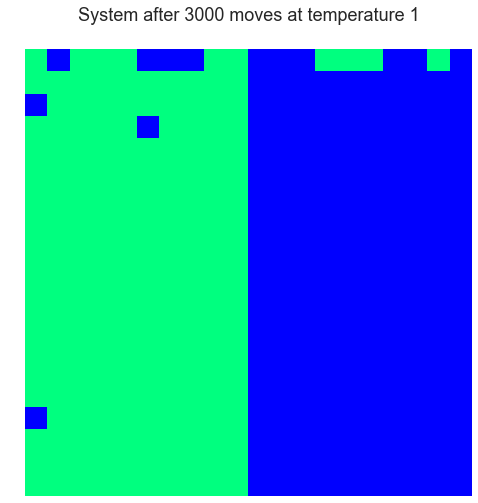

In [2]:
class Two_D_Ising:

    def __init__(self, N, is_random=False):
        self.N = N
        if is_random:
            system = np.random.uniform(0, 1, size=(N, N)).round()
            system = (2 * system) - 1
            self.system = system.astype(np.int16)
        else:
            assert N % 2 == 0, "N must be even for pure state initialization"
            up   = np.ones(shape=(N, int(N/2)))
            down = -1 * np.ones(shape=(N, int(N/2)))
            self.system = np.hstack([up, down])

    def valid_coords(self, row, col, i, j):
        N = self.N
        return (row + i < N and col + j < N and row + i > 0 and col + j > 0)

    def sum_nearby(self):
        r = self.row
        c = self.col
        nearby = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        return sum([self.system[r + i][c + j] for i, j in nearby if self.valid_coords(r, c, i, j)])
    
    def swap(self):
        self.system[self.row][self.col] *= -1

    def disorder_system(self, num_moves, temperature):
        beta = 1 / temperature
        for _ in range(num_moves):
            self.row = np.random.randint(0, high=self.N-1)
            self.col = np.random.randint(0, high=self.N-1)
            
            spin = self.system[self.row][self.col]
            cost = 2 * spin * self.sum_nearby()
            if cost < 0:
                self.swap()
            else:
                sample = np.random.uniform()
                prob   = np.exp(-beta * cost)
                if sample < prob:
                    self.swap()

num_moves   = 3000
temperature = 1
                    
model = Two_D_Ising(N = 20, is_random = False)
model.disorder_system(num_moves, temperature)

plt.figure(figsize=(8, 8))
plt.matshow(model.system, cmap="winter", fignum=1)
plt.axis('off')
plt.title(f"System after {num_moves} moves at temperature {temperature}", fontsize=18);